# Lab 5 - Data Visualization

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## NFL Offense Data

1. Import the NFL week 3, 4, and 5 data and add a week column to dataset and set the value to 3, 4, or 5 for all rows from that week. Combine the weekly dataframes by adding the dataframes together row-wise. Also merge the nfl_teams.csv data to this dataframe so that the division and conference info is included.

Importing dataframes

In [2]:
week3 = pd.read_csv('nfloffenseweek3.csv')
week4 = pd.read_csv('nfloffenseweek4.csv')
week5 = pd.read_csv('nfloffenseweek5.csv')

nfl_teams = pd.read_csv('nfl_teams.csv')
colors = pd.read_csv('teams_colors_logos.csv')

Adding week column

In [3]:
week3['week'] = 3
week4['week'] = 4
week5['week'] = 5

merging dataframes

In [4]:
df = pd.concat([week3,week4,week5])
df

,rank,team,games,points_scored,total_yards,offensive_plays,yards_per_play,turnovers_lost,fumbles_lost,1st_downs,...,rushing_touchdowns,rushing_yards_per_attempt,rushing_1st_downs,penalties,penalty_yards,1st_down_penalties,percentage_scoring_drives,percentage_turnover_drives,expected_points,week
0,1,Baltimore Ravens,3,99,1141,166,6.9,3,1,55,...,2,5.6,18,8,44,5,42.9,8.6,35.63,3
1,2,Detroit Lions,3,95,1227,203,6.0,2,0,63,...,5,5.9,20,15,129,5,40.5,5.4,31.05,3
2,3,Buffalo Bills,3,91,1324,213,6.2,5,3,77,...,1,4.7,22,20,136,6,46.7,16.7,47.46,3
3,4,Kansas City Chiefs,3,88,1122,180,6.2,3,2,68,...,2,4.1,15,15,124,8,45.2,6.5,40.73,3
4,5,Philadelphia Eagles,3,86,1341,208,6.4,1,0,73,...,6,4.4,26,23,173,6,39.4,3.0,45.06,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27,28,Chicago Bears,5,86,1370,266,5.2,8,4,73,...,5,4.9,38,27,211,9,36.5,13.5,-5.91,5
28,29,Los Angeles Rams,5,80,1499,312,4.8,12,5,93,...,3,3.2,19,17,156,8,31.4,23.5,-19.19,5
29,30,Pittsburgh Steelers,5,77,1479,306,4.8,9,3,92,...,4,3.9,27,30,213,6,26.3,12.3,-25.01,5
30,31,Denver Broncos,5,75,1718,318,5.4,6,3,84,...,2,4.3,26,44,335,8,29.3,10.3,-18.28,5


merging weeks with nfl_teams

renaming columns to merge

In [5]:
nfl_teams.columns
nfl_teams.columns = ['ID', 'team', 'Abbreviation', 'Conference', 'Division']
nfl_teams.columns

Index(['ID', 'team', 'Abbreviation', 'Conference', 'Division'], dtype='object')

Renaming the nfl_teams scv rows to match the other ones

In [6]:
nfl_teams["team"] = nfl_teams["team"].replace("NY Giants", "New York Giants")
nfl_teams["team"] = nfl_teams["team"].replace("NY Jets", "New York Jets")
nfl_teams["team"] = nfl_teams["team"].replace("Washington Football Team", "Washington Commanders")


In [7]:
df = pd.merge(df, nfl_teams, on='team', how='outer')
df

,rank,team,games,points_scored,total_yards,offensive_plays,yards_per_play,turnovers_lost,fumbles_lost,1st_downs,...,penalty_yards,1st_down_penalties,percentage_scoring_drives,percentage_turnover_drives,expected_points,week,ID,Abbreviation,Conference,Division
0,1,Baltimore Ravens,3,99,1141,166,6.9,3,1,55,...,44,5,42.9,8.6,35.63,3,3,BAL,AFC,North
1,3,Baltimore Ravens,4,119,1437,230,6.2,5,1,77,...,114,7,42.2,11.1,32.97,4,3,BAL,AFC,North
2,4,Baltimore Ravens,5,138,1762,291,6.1,6,1,99,...,162,9,43.6,10.9,36.86,5,3,BAL,AFC,North
3,2,Detroit Lions,3,95,1227,203,6.0,2,0,63,...,129,5,40.5,5.4,31.05,3,11,DET,NFC,North
4,1,Detroit Lions,4,140,1747,269,6.5,4,1,90,...,188,7,45.8,8.3,53.17,4,11,DET,NFC,North
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,30,Denver Broncos,4,66,1343,247,5.4,4,3,66,...,286,7,31.8,9.1,-6.92,4,10,DEN,AFC,West
92,31,Denver Broncos,5,75,1718,318,5.4,6,3,84,...,335,8,29.3,10.3,-18.28,5,10,DEN,AFC,West
93,32,Indianapolis Colts,3,40,994,207,4.8,6,2,61,...,153,4,22.9,17.1,-22.10,3,14,IND,AFC,South
94,32,Indianapolis Colts,4,57,1359,270,5.0,9,4,82,...,203,5,25.0,20.5,-18.74,4,14,IND,AFC,South


In [8]:
colors.columns = ['Abbreviation', 'team_name', 'team_id', 'team_nick', 'team_conf',
       'team_division', 'team_color', 'team_color2', 'team_color3',
       'team_color4', 'team_logo_wikipedia', 'team_logo_espn', 'team_wordmark',
       'team_conference_logo', 'team_league_logo', 'team_logo_squared']

colors_merged = pd.merge(df, colors, on='Abbreviation')
colors_merged

,rank,team,games,points_scored,total_yards,offensive_plays,yards_per_play,turnovers_lost,fumbles_lost,1st_downs,...,team_color,team_color2,team_color3,team_color4,team_logo_wikipedia,team_logo_espn,team_wordmark,team_conference_logo,team_league_logo,team_logo_squared
0,1,Baltimore Ravens,3,99,1141,166,6.9,3,1,55,...,#241773,#9E7C0C,#9e7c0c,#c60c30,https://upload.wikimedia.org/wikipedia/en/thum...,https://a.espncdn.com/i/teamlogos/nfl/500/bal.png,https://github.com/nflverse/nflverse-pbp/raw/m...,https://github.com/nflverse/nflverse-pbp/raw/m...,https://raw.githubusercontent.com/nflverse/nfl...,https://github.com/nflverse/nflverse-pbp/raw/m...
1,3,Baltimore Ravens,4,119,1437,230,6.2,5,1,77,...,#241773,#9E7C0C,#9e7c0c,#c60c30,https://upload.wikimedia.org/wikipedia/en/thum...,https://a.espncdn.com/i/teamlogos/nfl/500/bal.png,https://github.com/nflverse/nflverse-pbp/raw/m...,https://github.com/nflverse/nflverse-pbp/raw/m...,https://raw.githubusercontent.com/nflverse/nfl...,https://github.com/nflverse/nflverse-pbp/raw/m...
2,4,Baltimore Ravens,5,138,1762,291,6.1,6,1,99,...,#241773,#9E7C0C,#9e7c0c,#c60c30,https://upload.wikimedia.org/wikipedia/en/thum...,https://a.espncdn.com/i/teamlogos/nfl/500/bal.png,https://github.com/nflverse/nflverse-pbp/raw/m...,https://github.com/nflverse/nflverse-pbp/raw/m...,https://raw.githubusercontent.com/nflverse/nfl...,https://github.com/nflverse/nflverse-pbp/raw/m...
3,2,Detroit Lions,3,95,1227,203,6.0,2,0,63,...,#0076B6,#B0B7BC,#000000,#004e89,https://upload.wikimedia.org/wikipedia/en/thum...,https://a.espncdn.com/i/teamlogos/nfl/500/det.png,https://github.com/nflverse/nflverse-pbp/raw/m...,https://github.com/nflverse/nflverse-pbp/raw/m...,https://raw.githubusercontent.com/nflverse/nfl...,https://github.com/nflverse/nflverse-pbp/raw/m...
4,1,Detroit Lions,4,140,1747,269,6.5,4,1,90,...,#0076B6,#B0B7BC,#000000,#004e89,https://upload.wikimedia.org/wikipedia/en/thum...,https://a.espncdn.com/i/teamlogos/nfl/500/det.png,https://github.com/nflverse/nflverse-pbp/raw/m...,https://github.com/nflverse/nflverse-pbp/raw/m...,https://raw.githubusercontent.com/nflverse/nfl...,https://github.com/nflverse/nflverse-pbp/raw/m...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,30,Denver Broncos,4,66,1343,247,5.4,4,3,66,...,#002244,#FB4F14,#00234c,#ff5200,https://upload.wikimedia.org/wikipedia/en/thum...,https://a.espncdn.com/i/teamlogos/nfl/500/den.png,https://github.com/nflverse/nflverse-pbp/raw/m...,https://github.com/nflverse/nflverse-pbp/raw/m...,https://raw.githubusercontent.com/nflverse/nfl...,https://github.com/nflverse/nflverse-pbp/raw/m...
92,31,Denver Broncos,5,75,1718,318,5.4,6,3,84,...,#002244,#FB4F14,#00234c,#ff5200,https://upload.wikimedia.org/wikipedia/en/thum...,https://a.espncdn.com/i/teamlogos/nfl/500/den.png,https://github.com/nflverse/nflverse-pbp/raw/m...,https://github.com/nflverse/nflverse-pbp/raw/m...,https://raw.githubusercontent.com/nflverse/nfl...,https://github.com/nflverse/nflverse-pbp/raw/m...
93,32,Indianapolis Colts,3,40,994,207,4.8,6,2,61,...,#002C5F,#a5acaf,#013369,#9ba1a2,https://upload.wikimedia.org/wikipedia/commons...,https://a.espncdn.com/i/teamlogos/nfl/500/ind.png,https://github.com/nflverse/nflverse-pbp/raw/m...,https://github.com/nflverse/nflverse-pbp/raw/m...,https://raw.githubusercontent.com/nflverse/nfl...,https://github.com/nflverse/nflverse-pbp/raw/m...
94,32,Indianapolis Colts,4,57,1359,270,5.0,9,4,82,...,#002C5F,#a5acaf,#013369,#9ba1a2,https://upload.wikimedia.org/wikipedia/commons...,https://a.espncdn.com/i/teamlogos/nfl/500/ind.png,https://github.com/nflverse/nflverse-pbp/raw/m...,https://github.com/nflverse/nflverse-pbp/raw/m...,https://raw.githubusercontent.com/nflverse/nfl...,https://github.com/nflverse/nflverse-pbp/raw/m...


2. Plot the average number of points scored each week for each team on a horizontal bar chart (with teams on the vertical axis and points on the horizontal axis). Add the points scored for each bar. (Hint: check out `plt.bar_label()`)

<BarContainer object of 96 artists>

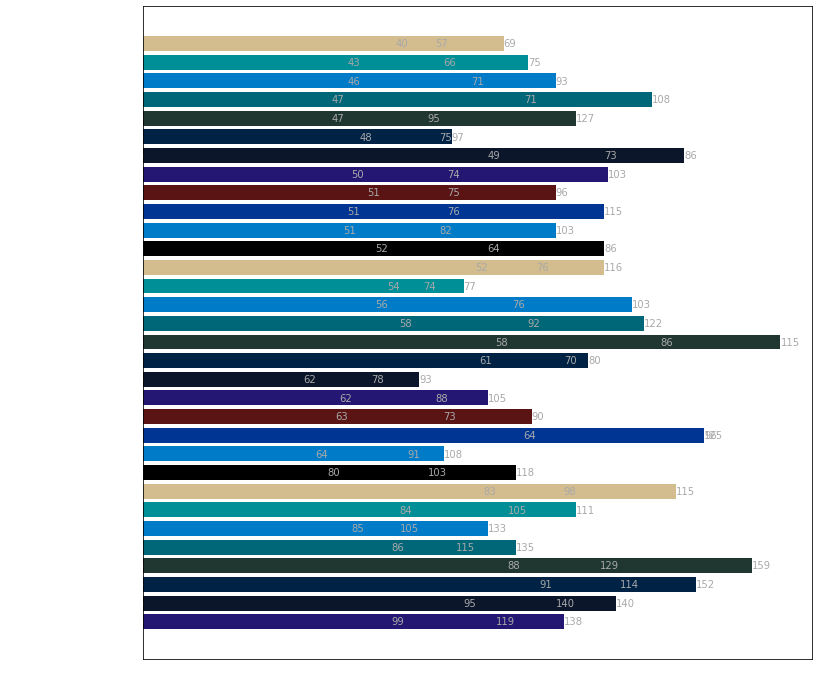

In [9]:
plt.figure(figsize=(12, 12))
c = ['white', 'black']
#fig, ax = plt.subplots()
plt.tick_params(axis="both",color="white")
plt.xticks(color="white")
plt.yticks(color="white")
barhplot = plt.barh(df.team, df.groupby(['team','week'])['points_scored'].mean(), color=colors.team_color)
plt.bar_label(barhplot, labels = df.points_scored, color='darkgray')
barhplot

3. Plot the average passing yards and average rushing yards for each team as a stacked bar chart.

C:\Users\Abbie\AppData\Local\Temp\ipykernel_80924\569953834.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels, rotation = (45), fontsize = 12)


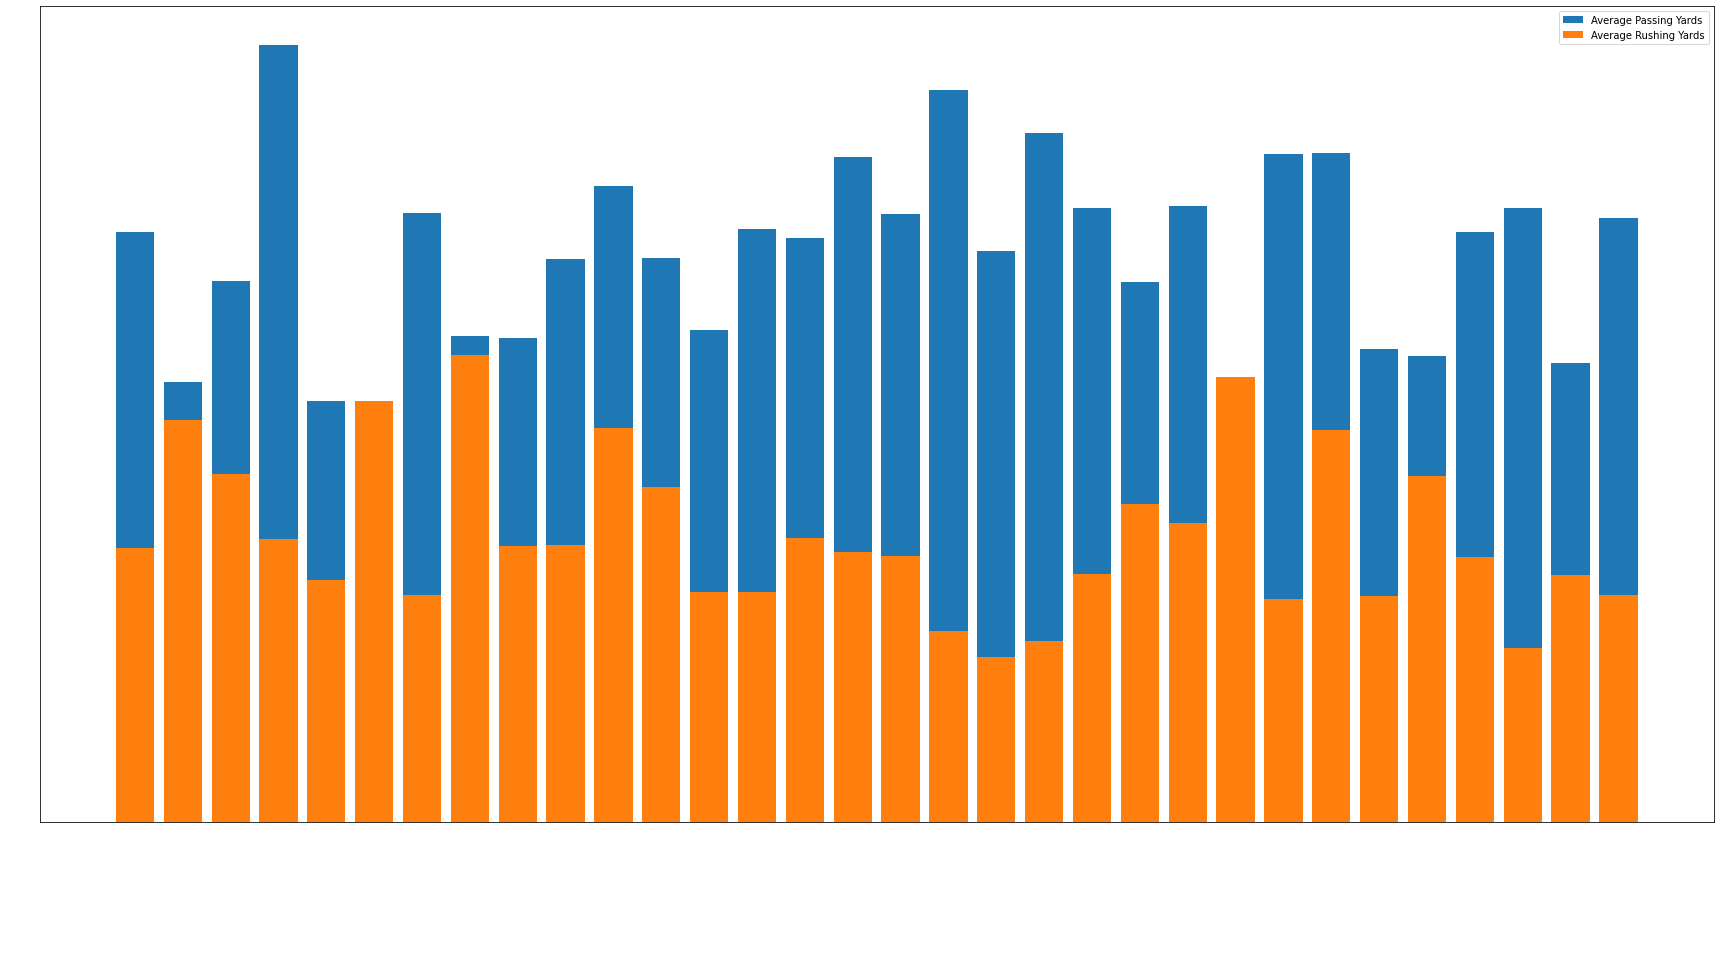

In [23]:
labels = df.groupby('team')['team'].first()
pas_yards = df.groupby('team')['passing_yards'].mean()
rush_yards = df.groupby('team')['rushing_yards'].mean()
fig, ax = plt.subplots()
ax.bar(labels, pas_yards, label='Average Passing Yards')
ax.bar(labels, rush_yards, label='Average Rushing Yards')
plt.tick_params(axis="both",color="white")
plt.xticks(color="white")
plt.yticks(color="white")
fig.set_figwidth(30)
fig.set_figheight(15)
ax.set_xticklabels(labels, rotation = (45), fontsize = 12)

ax.legend()

plt.show()

4. Plot the average total yards vs average first downs for each team on a scatter plot (with first downs on the x axis and total yards on the y axis).

Text(0, 0.5, 'Average total yards')

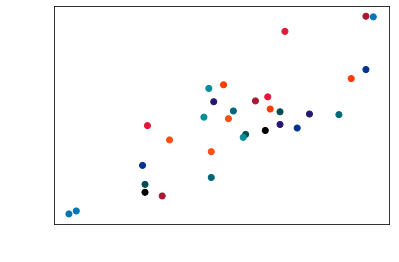

In [11]:
total_yards = df.groupby('team')['total_yards'].mean()
first_downs = df.groupby('team')['1st_downs'].mean()
plt.tick_params(axis="both",color="white")
plt.xticks(color="white")
plt.yticks(color="white")
plt.scatter(x=first_downs, y=total_yards, color=colors_merged.iloc[0:32].team_color)
plt.xlabel('Average first downs', color='white')
plt.ylabel('Average total yards', color='white')


5. Plot the penalty yards for the Balitmore Ravens and the LA Rams for each week as a line chart (with week on the x-axis and penalty yards on the y-axis).

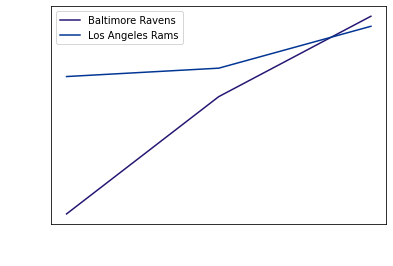

In [12]:
plt.plot( df[(df.team == 'Baltimore Ravens')].week, df[(df.team == 'Baltimore Ravens')].penalty_yards, label='Baltimore Ravens', color='#241773')
plt.plot(df[(df.team == 'Los Angeles Rams')].week, df[(df.team== 'Los Angeles Rams')].penalty_yards, label='Los Angeles Rams', color='#003594')
plt.tick_params(axis="both",color="white")
plt.xticks(color="white")
plt.yticks(color="white")
plt.xlabel("Week", color='white', fontsize=14)
plt.ylabel("Penalty Yards", color='white', fontsize=14)
plt.legend()

6. Plot the average total points vs average yards per play for each team as a bar chart (with total points on the y-axis and yards per play on the x-axis).

Text(0, 0.5, 'Average Total Points')

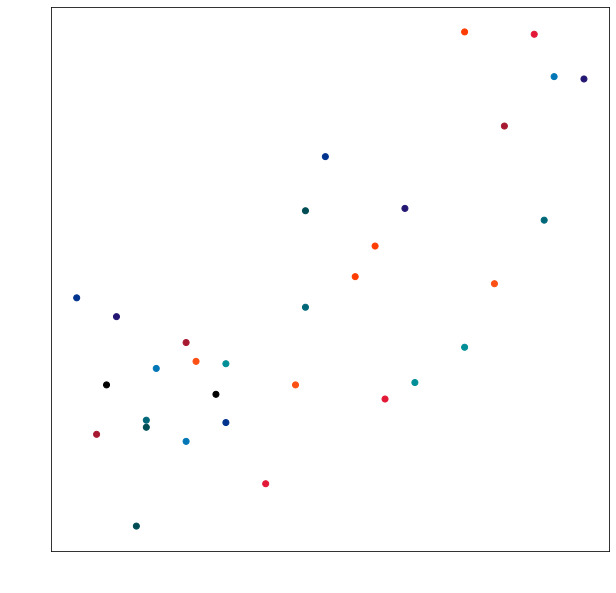

In [26]:
plt.figure(figsize=(10, 10))
plt.scatter(df.groupby('team')['yards_per_play'].mean(), df.groupby('team')['points_scored'].mean(), color=colors_merged.iloc[0:32].team_color)
plt.tick_params(axis="both",color="white")
plt.xticks(color="white")
plt.yticks(color="white")
plt.xlabel("Average Yards Per Play", color='white', fontsize=14)
plt.ylabel("Average Total Points", color='white', fontsize=14)


7. Plot the number of penalty yards for each team in the NFC West for each week on bar chart.

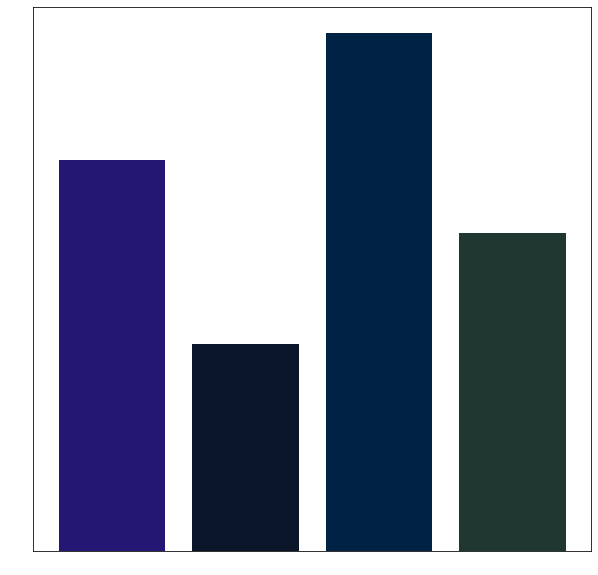

In [14]:
plt.figure(figsize=(10, 10));
plt.bar(df[(df.Conference=='NFC') & (df.Division == "West")].team, df[(df.Conference=='NFC') & (df.Division == "West")].penalty_yards, color=colors.team_color);
plt.tick_params(axis="both",color="white");
plt.xticks(color="white");
plt.yticks(color="white");

8. Plot the average number of weekly points per (conference and division) on a horizontal bar chart. (There will be 8 bars.)

<AxesSubplot:ylabel='Conference,Division'>

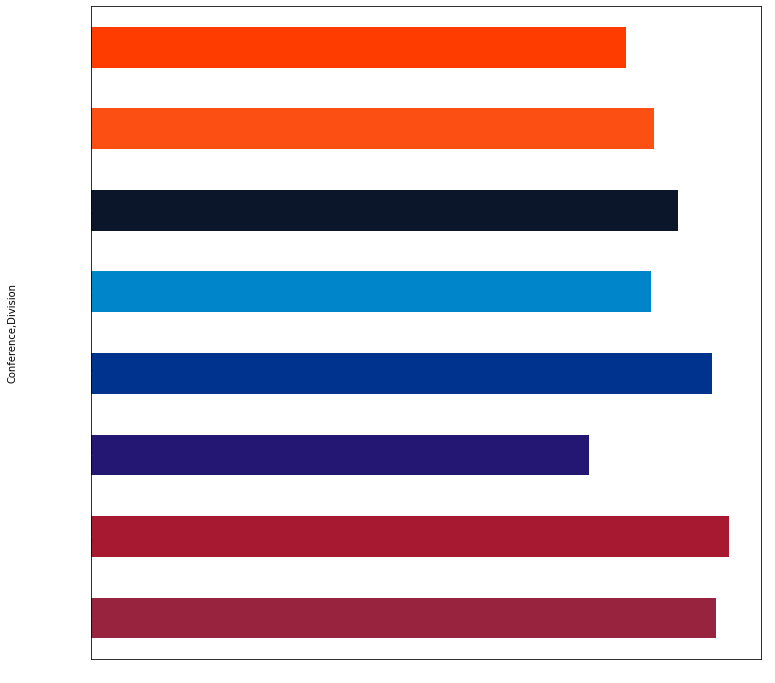

In [15]:
plt.figure(figsize=(12, 12))
#fig, ax = plt.subplots()
plt.tick_params(axis="both",color="white")
plt.xticks(color="white")
plt.yticks(color="white")
df.groupby(['Conference','Division'])['points_scored'].mean().plot(kind='barh', color=colors.team_color)